In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
fold_name='/mnt/data1/users/arikhind/phot_data/photometry'
even_name='SN2023ixf'
print(os.path.exists(fold_name))
from astropy.time import Time


True


In [2]:
def read_phot_files(file_):
    data1 = open(file_,'r')
    line1,line2 = np.asarray(data1.readlines()[:2])#.split(' ')[:-1])
    # print(line1)#,line2)
    line1 = line1.split(' ')[:-1]
    if 'Liverpool' in line2:line1.append('LT')
    else:line1.append(line2.split(' ')[-1][:-1])


    return line1

In [7]:
day_now = Time.now().mjd
# read_phot_files('ZTF23abnprwj/SN2023vyl_g2023-1_44657_photometry.txt')
ind = [0,1,2,3,4,-1,5,8]
df = pd.DataFrame(columns=['name','filter','mjd','mag','mag_err','telescope','mag_lim','expt'])
c=0

# df_u = pd.DataFrame(columns=['filter','mjd','mag','mag_err','telescope'])
not_stacked = []
for file_ in glob.glob(fold_name+'/*photometry.txt'):
    # print(file_)
    if even_name not in file_:continue

        # print(file_)
        # continue
    line1 = read_phot_files(file_)
    # if all(x in line1 for x in ['SLT','sdssu']):# and 'stacked' not in file_:
    #     print(file_,line1)
    #     not_stacked.append(file_)
    df.loc[c] = [line1[i] for i in ind]
    c+=1

df['name'] =[name.replace('-ugriz','') for name in df['name']]
df['mjd'] = df['mjd'].astype(float)
df['mag'] = df['mag'].astype(float)
df['mag_err'] = df['mag_err'].astype(float)
df['telescope'] = df['telescope'].astype(str)
df['filter'] = df['filter'].astype(str)
df['mag_lim'] = df['mag_lim'].astype(float)
df['expt'] = df['expt'].astype(float)

df = df[df['name']=='SN2023ixf']
print(df)
df.sort_values(by='mjd').to_csv('Latest_'+even_name+'_phot.csv',index=False)
# df.sort_values(by='mjd').to_csv(fold_name+'/'+even_name+'_phot.csv',index=False)

# to_csv(fold_name+'/'+even_name+'_phot.csv',index=False)
# print(df['telescope'])
# print(df[df['filter']=='sdssi'].sort_values(by='mjd'))#.to_csv(name+'_sdssz.csv',index=False
# c=0
# for file_ in glob.glob(name+'_u/*photometry.txt'):
#     line1 = read_phot_files(file_)
#     # print(line1)
#     df_u.loc[c] = [line1[i] for i in ind]
#     c+=1
# # df.loc[df['filter']=='sdssu'].sort_values(by='mjd')#.to_csv(name+'_sdssu.csv',index=False)

# print(df_u)

# df_u['mjd'] = df_u['mjd'].astype(float)
# df_u['mag'] = df_u['mag'].astype(float)
# df_u['mag_err'] = df_u['mag_err'].astype(float)
# df_u['telescope'] = df_u['telescope'].astype(str)
# df_u['filter'] = df_u['filter'].astype(str)
# day_now = 60503
# df['mjd'] = abs(df['mjd']-day_now)

          name filter           mjd     mag  mag_err telescope  mag_lim  expt
0    SN2023ixf  sdssg  60517.970323  18.889    0.042        LT   21.725  70.0
1    SN2023ixf  sdssr  60517.973629  18.089    0.048        LT   21.424  70.0
2    SN2023ixf  sdssi  60517.972490  18.460    0.043        LT   21.337  70.0
3    SN2023ixf  sdssz  60517.974739  18.654    0.053        LT   21.231  75.0
4    SN2023ixf  sdssg  60083.923144  14.525    0.024        LT   22.298  60.0
..         ...    ...           ...     ...      ...       ...      ...   ...
601  SN2023ixf  sdssi  60706.110620  20.623    0.293        LT   21.036  90.0
602  SN2023ixf  sdssz  60706.113349  99.000    9.950        LT   20.111  75.0
603  SN2023ixf  sdssg  60711.097826  20.459    0.115        LT   21.657  90.0
604  SN2023ixf  sdssr  60711.101852  19.559    0.087        LT   21.172  90.0
605  SN2023ixf  sdssz  60711.103202  20.486    0.326        LT   20.602  75.0

[606 rows x 8 columns]


In [21]:
# pd.DataFrame(df.loc[df['filter']=='sdssu']).sort_values(by='mjd')

In [22]:
# pd.DataFrame(df.loc[df['filter']=='sdssi']).sort_values(by='mjd')


Text(0.5, 0, 'Days ago (60758.51416237634)')

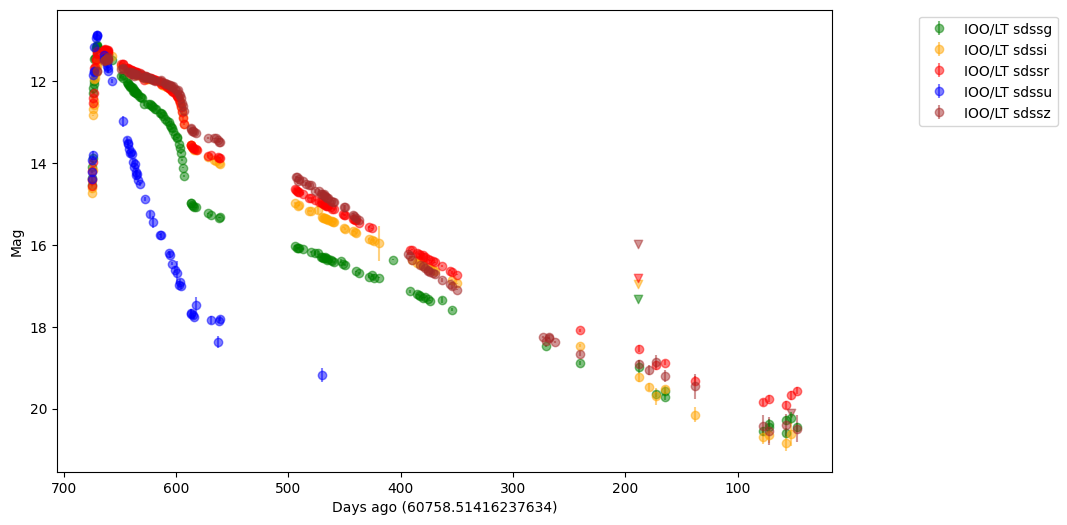

In [10]:
#plot on data with telescope==LT as circles
filt_cols = {'sdssg':'g','sdssr':'r','sdssi':'orange','sdssz':'brown','sdssu':'blue'}
fig=plt.figure(figsize=(10,6))
unique_filts = np.unique(df['filter'])
for filt in unique_filts:
    # if filt=='sdssu':continue
    # print(filt)
    df_lt_ = df.loc[(df['filter']==filt)&(df['telescope']=='LT')&(df['mag']<30)&(df['mag_err']<1)]
    plt.errorbar(abs(df_lt_['mjd']-day_now),df_lt_['mag'],yerr=df_lt_['mag_err'],fmt='o',label='IOO/LT '+filt,alpha=0.5,color=filt_cols[filt])
    df_lt_ul = df.loc[(df['mag']>30)&(df['filter']==filt)]
    # print(df_lt_ul)
    plt.scatter(abs(df_lt_ul['mjd']-day_now),df_lt_ul['mag_lim'],marker='v',color=filt_cols[filt],alpha=0.5)

# for filt in unique_filts:
    # df_slt_= df.loc[(df['filter']==filt)&(df['telescope']=='SLT')&(df['mag']<30)]
    # plt.errorbar(df_slt_['mjd'],df_slt_['mag'],yerr=df_slt_['mag_err'],fmt='x',label='SLT '+filt,alpha=0.5,color=filt_cols[filt])


    # df_gtc_osiris = df.loc[(df['filter']==filt)&(df['telescope']=='GTC-OSIRIS')&(df['mag']<30)]
    # plt.errorbar(df_gtc_osiris['mjd'],df_gtc_osiris['mag'],yerr=df_gtc_osiris['mag_err'],fmt='s',label='GTC-OSIRIS '+filt,alpha=0.5,color=filt_cols[filt])

plt.gca().invert_yaxis()
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1),ncols=1)
# plt.xlim(60550,)
plt.gca().invert_xaxis()
plt.ylabel('Mag')
# day_now=0
plt.xlabel('Days ago'+' ('+str(day_now)+')')
# df.to_csv('2023ixf_LT_K_phot.csv',index=False)
# plt.xlim(60221.1,60221.16)
# df['mjd'].loc[(df['mjd']<=60221.16)&(df['mjd']>=60221.1)]
# plt.axvline(60370)

In [6]:
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

import certifi
import os
# os.environ['SSL_CERT_FILE'] = certifi.where()

# import subprocess
# subprocess.run(["/bin/bash", "-c", "pip install certifi --upgrade --force-reinstall"])
import requests
import urllib.parse
token="549e219d-b0eb-4a19-98ee-3a658af2303b"
def api(method,endpoint,data=None):
    headers={"Authorization":f"token {token}"}
    response=requests.request(method.upper(),urllib.parse.urljoin("https://fritz.science", endpoint),json=data,headers=headers)

    return response

def SN_data_phot(name):
    '''Retrieves individual events, form needs to be an array or a list, puts data into a dataframe'''
    data_array = []


    # while True:
    response = api("get", f"api/sources/{name}/photometry")
    # if response.status_code==200:
        # break
    data = response.json().get("data", None)
    print(response.status_code)
    if len(data) ==0:
        df = pd.DataFrame()
    else:
        df = pd.DataFrame(data).sort_values(by=['mjd'], ascending=True)

    return df

all_sn_data = SN_data_phot(even_name)
print(np.unique(all_sn_data['instrument_name']))

# ioo = all_sn_data.loc[all_sn_data['origin']=='LT_IOO_PIPE']

200
['ALFOSC' 'ATLAS' 'IOO' 'SEDM' 'ZTF']


In [8]:
sedm = all_sn_data.loc[all_sn_data['origin']=='SEDM_FPIPE_SDSS']
ztf = all_sn_data.loc[all_sn_data['instrument_name']=='ZTF']
uvot = all_sn_data.loc[all_sn_data['instrument_name']=='UVOT']
alfosc = all_sn_data.loc[all_sn_data['instrument_name']=='ALFOSC']

# print(all_sn_data.columns)
# np.unique(uvot['filter'])

In [12]:
alfosc
# ioo
# sedm
# df[['mag','mag_err','mjd','filter','telescope']].loc[(df['filter']=='sdssg')].sort_values(by='mjd')
# &(df['filter'])=='sdssu'].sort_values(by='mjd')
# df['telescope'].unique()

,obj_id,ra,dec,filter,mjd,snr,instrument_id,instrument_name,ra_unc,dec_unc,origin,id,altdata,created_at,groups,mag,magerr,magsys,limiting_mag
4467,ZTF24abdiwwv,NaN,NaN,sdssg,60620.026,31.021034,26,ALFOSC,None,None,None,649681730,None,2024-11-26T15:43:15.444991,"[{'id': 1, 'name': 'Sitewide Group', 'nickname...",20.768,0.035,ab,999.000
4468,ZTF24abdiwwv,NaN,NaN,sdssg,60620.027,12.479726,26,ALFOSC,None,None,None,649681731,None,2024-11-26T15:43:15.445053,"[{'id': 1, 'name': 'Sitewide Group', 'nickname...",20.662,0.087,ab,999.000
4469,ZTF24abdiwwv,NaN,NaN,sdssr,60620.029,8.616954,26,ALFOSC,None,None,None,649681732,None,2024-11-26T15:43:15.445074,"[{'id': 1, 'name': 'Sitewide Group', 'nickname...",19.561,0.126,ab,999.000
4470,ZTF24abdiwwv,NaN,NaN,sdssr,60620.031,9.870329,26,ALFOSC,None,None,None,649681733,None,2024-11-26T15:43:15.445091,"[{'id': 1, 'name': 'Sitewide Group', 'nickname...",19.465,0.110,ab,999.000
4471,ZTF24abdiwwv,NaN,NaN,sdssi,60620.033,7.811052,26,ALFOSC,None,None,None,649681734,None,2024-11-26T15:43:15.445106,"[{'id': 1, 'name': 'Sitewide Group', 'nickname...",19.396,0.139,ab,999.000
4472,ZTF24abdiwwv,NaN,NaN,sdssi,60620.035,72.382414,26,ALFOSC,None,None,None,649681735,None,2024-11-26T15:43:15.445121,"[{'id': 1, 'name': 'Sitewide Group', 'nickname...",19.540,0.015,ab,999.000
4564,ZTF24abdiwwv,NaN,NaN,sdssg,60639.006,13.404151,26,ALFOSC,None,None,None,649681736,None,2024-11-26T15:43:15.445136,"[{'id': 1, 'name': 'Sitewide Group', 'nickname...",21.420,0.081,ab,21.510
4565,ZTF24abdiwwv,NaN,NaN,sdssg,60639.009,17.798954,26,ALFOSC,None,None,None,649681737,None,2024-11-26T15:43:15.445154,"[{'id': 1, 'name': 'Sitewide Group', 'nickname...",21.441,0.061,ab,22.134
4566,ZTF24abdiwwv,NaN,NaN,sdssr,60639.011,41.759085,26,ALFOSC,None,None,None,649681738,None,2024-11-26T15:43:15.445169,"[{'id': 1, 'name': 'Sitewide Group', 'nickname...",20.272,0.026,ab,999.000
4567,ZTF24abdiwwv,NaN,NaN,sdssr,60639.014,43.429448,26,ALFOSC,None,None,None,649681739,None,2024-11-26T15:43:15.445184,"[{'id': 1, 'name': 'Sitewide Group', 'nickname...",20.251,0.025,ab,999.000


(60500.0, 60664.04594635)

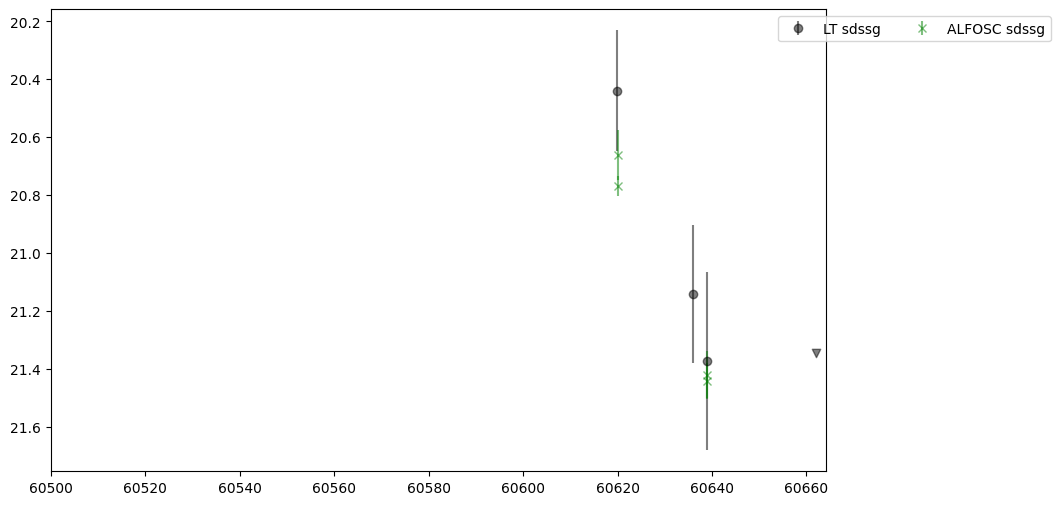

In [15]:
fig=plt.figure(figsize=(10,6))
unique_filts = np.unique(df['filter'])

filt = 'sdssg'
df_ltg = df.loc[(df['filter']==filt)&(df['telescope']=='LT')]
plt.errorbar(df_ltg['mjd'].loc[df_ltg['mag']<50],df_ltg['mag'].loc[df_ltg['mag']<50],yerr=df_ltg['mag_err'].loc[df_ltg['mag']<50],fmt='o',label='LT '+filt,alpha=0.5,color='k')
plt.scatter(df_ltg['mjd'].loc[df_ltg['mag']>50],df_ltg['mag_lim'].loc[df_ltg['mag']>50],marker='v',color='k',alpha=0.5,)

# ztf_g = ztf.loc[ztf['filter']=='ztfg']
# plt.errorbar(ztf_g['mjd'],ztf_g['mag'],yerr=ztf_g['magerr'],fmt='s',label='ZTF '+filt,alpha=0.5,color=filt_cols[filt])

# sedm_p60g = sedm.loc[sedm['filter']==filt]
# plt.errorbar(sedm_p60g['mjd'],sedm_p60g['mag'],yerr=sedm_p60g['magerr'],fmt='^',label='SEDM '+filt,alpha=0.5,color=filt_cols[filt])

alfosc_g = alfosc.loc[alfosc['filter']==filt]
plt.errorbar(alfosc_g['mjd'],alfosc_g['mag'],yerr=alfosc_g['magerr'],fmt='x',label='ALFOSC '+filt,alpha=0.5,color=filt_cols[filt])

plt.gca().invert_yaxis()
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1),ncols=2)
plt.xlim(60500)
# df_bad = df.loc[(df['filter']=='sdssg')&(df['telescope']=='SLT')&(df['mag']<30)&(df['mag']>17.5)]
# print(filt,df_bad[['mjd','mag']])

# good_g = df.loc[(df['filter']=='sdssg')&(any(x in ['SLT','LT','GTC-OSIRIS'] for x in df['telescope']))&(df['mag']<20.5)]
# good_g

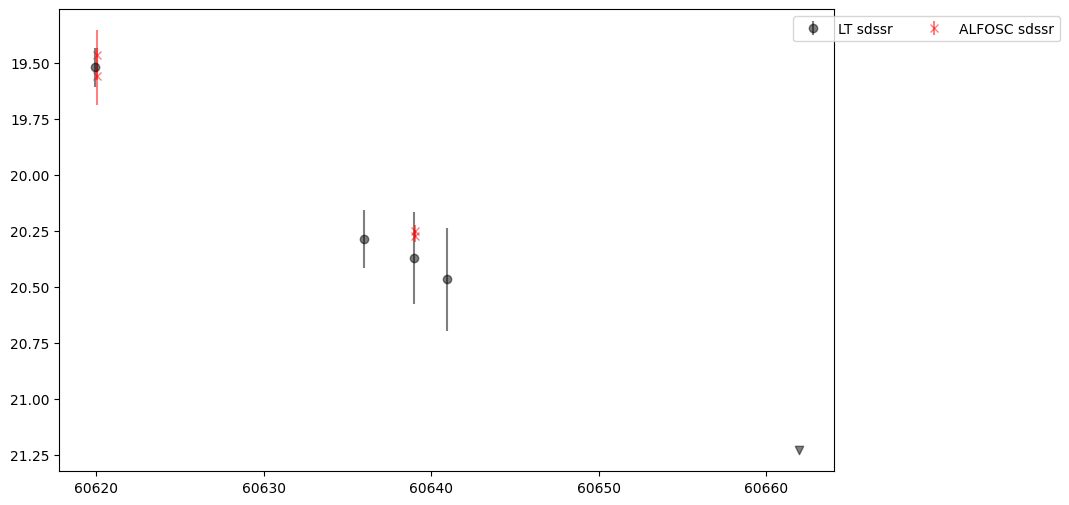

In [22]:
fig=plt.figure(figsize=(10,6))
unique_filts = np.unique(df['filter'])

filt = 'sdssr'
df_ltr = df.loc[(df['filter']==filt)&(df['telescope']=='LT')]
plt.errorbar(df_ltr['mjd'].loc[df_ltr['mag']<50],df_ltr['mag'].loc[df_ltr['mag']<50],yerr=df_ltr['mag_err'].loc[df_ltr['mag']<50],fmt='o',label='LT '+filt,alpha=0.5,color='k')
plt.scatter(df_ltr['mjd'].loc[df_ltr['mag']>50],df_ltr['mag_lim'].loc[df_ltr['mag']>50],marker='v',color='k',alpha=0.5,)

# ztf_r = ztf.loc[ztf['filter']=='ztfr']
# plt.errorbar(ztf_r['mjd'],ztf_r['mag'],yerr=ztf_r['magerr'],fmt='s',label='ZTF '+filt,alpha=0.5,color=filt_cols[filt])

# df_sltr = df.loc[(df['filter']==filt)&(df['telescope']!='LT')]
# plt.errorbar(df_sltr['mjd'],df_sltr['mag'],yerr=df_sltr['mag_err'],fmt='x',label='SLT '+filt,alpha=0.5,color=filt_cols[filt])

# ioor_ = ioo.loc[ioo['filter']==filt]
# plt.errorbar(ioor_['mjd'],ioor_['mag'],yerr=ioor_['magerr'],fmt='o',label='LT '+filt,alpha=0.5,color=filt_cols[filt])

# sedm_p60r = sedm.loc[sedm['filter']==filt]
# plt.errorbar(sedm_p60r['mjd'],sedm_p60r['mag'],yerr=sedm_p60r['magerr'],fmt='^',label='SEDM '+filt,alpha=0.5,color=filt_cols[filt])

alfosc_r = alfosc.loc[alfosc['filter']==filt]
plt.errorbar(alfosc_r['mjd'],alfosc_r['mag'],yerr=alfosc_r['magerr'],fmt='x',label='ALFOSC '+filt,alpha=0.5,color=filt_cols[filt])

plt.gca().invert_yaxis()
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1),ncols=2)

# df_ = df.loc[(df['filter']=='sdssr')&(df['telescope']=='SLT')&(df['mag']<30)&(df['mag']>18)]
# print(filt,df_[['mjd','mag']])

# good_r = df.loc[(df['filter']=='sdssr')&(any(x in ['SLT','LT','GTC-OSIRIS'] for x in df['telescope']))&(df['mag']<18)]

sdssi Empty DataFrame
Columns: [mjd, mag]
Index: []


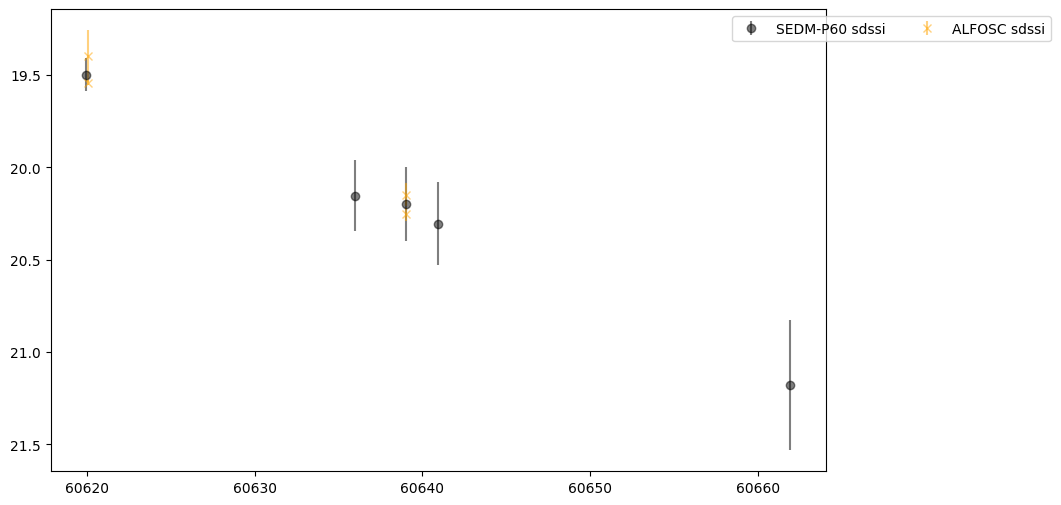

In [17]:
fig=plt.figure(figsize=(10,6))
unique_filts = np.unique(df['filter'])

filt = 'sdssi'
df_lti = df.loc[(df['filter']==filt)&(df['telescope']=='LT')]
plt.errorbar(df_lti['mjd'].loc[df_lti['mag']<50],df_lti['mag'].loc[df_lti['mag']<50],yerr=df_lti['mag_err'].loc[df_lti['mag']<50],fmt='o',label='SEDM-P60 '+filt,alpha=0.5,color='k')
plt.scatter(df_lti['mjd'].loc[df_lti['mag']>50],df_lti['mag_lim'].loc[df_lti['mag']>50],marker='v',color='k',alpha=0.5,)

# ztf_i = ztf.loc[ztf['filter']=='ztfi']
# plt.errorbar(ztf_i['mjd'],ztf_i['mag'],yerr=ztf_i['magerr'],fmt='s',label='ZTF '+filt,alpha=0.5,color=filt_cols[filt])

# df_slti = df.loc[(df['filter']==filt)&(df['telescope']=='SLT')]
# plt.errorbar(df_slti['mjd'],df_slti['mag'],yerr=df_slti['mag_err'],fmt='x',label='SLT '+filt,alpha=0.5,color=filt_cols[filt])

# iooi_ = ioo.loc[ioo['filter']==filt]
# plt.errorbar(iooi_['mjd'],iooi_['mag'],yerr=iooi_['magerr'],fmt='o',label='LT '+filt,alpha=0.5,color=filt_cols[filt])

# sedm_p60i = sedm.loc[sedm['filter']==filt]
# plt.errorbar(sedm_p60i['mjd'],sedm_p60i['mag'],yerr=sedm_p60i['magerr'],fmt='^',label='SEDM '+filt,alpha=0.5,color=filt_cols[filt])

alfosc_i = alfosc.loc[alfosc['filter']==filt]
plt.errorbar(alfosc_i['mjd'],alfosc_i['mag'],yerr=alfosc_i['magerr'],fmt='x',label='ALFOSC '+filt,alpha=0.5,color=filt_cols[filt])

plt.gca().invert_yaxis()
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1),ncols=2)
df_ = df.loc[(df['filter']=='sdssi')&(df['telescope']=='SLT')&(df['mag']<30)&(df['mag']>18)]
print(filt,df_[['mjd','mag']])

# good_i = df.loc[(df['filter']=='sdssi')&(any(x in ['SLT','LT','GTC-OSIRIS'] for x in df['telescope']))&(df['mag']<18)]

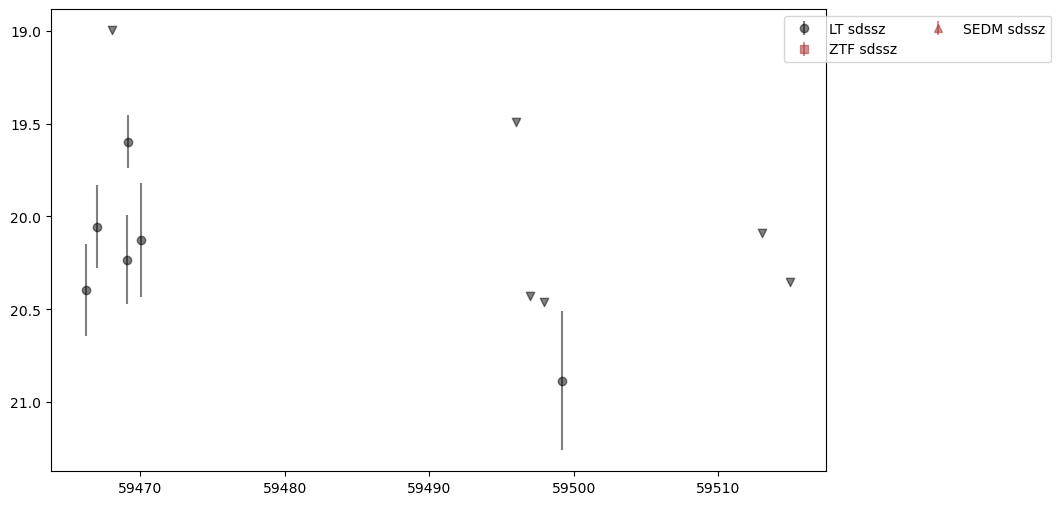

In [11]:
fig=plt.figure(figsize=(10,6))
unique_filts = np.unique(df['filter'])

filt = 'sdssz'
df_ltz = df.loc[(df['filter']==filt)&(df['telescope']=='LT')]
plt.errorbar(df_ltz['mjd'].loc[df_ltz['mag']<50],df_ltz['mag'].loc[df_ltz['mag']<50],yerr=df_ltz['mag_err'].loc[df_ltz['mag']<50],fmt='o',label='LT '+filt,alpha=0.5,color='k')
plt.scatter(df_ltz['mjd'].loc[df_ltz['mag']>50],df_ltz['mag_lim'].loc[df_ltz['mag']>50],marker='v',color='k',alpha=0.5,)

ztf_z = ztf.loc[ztf['filter']=='ztfz']
plt.errorbar(ztf_z['mjd'],ztf_z['mag'],yerr=ztf_z['magerr'],fmt='s',label='ZTF '+filt,alpha=0.5,color=filt_cols[filt])

# df_sltz = df.loc[(df['filter']==filt)&(df['telescope']=='SLT')]
# plt.errorbar(df_sltz['mjd'],df_sltz['mag'],yerr=df_sltz['mag_err'],fmt='x',label='SLT '+filt,alpha=0.5,color=filt_cols[filt])

# iooz_ = ioo.loc[ioo['filter']==filt]
# plt.errorbar(iooz_['mjd'],iooz_['mag'],yerr=iooz_['magerr'],fmt='o',label='LT '+filt,alpha=0.5,color=filt_cols[filt])

sedm_ = sedm.loc[sedm['filter']==filt]
plt.errorbar(sedm_['mjd'],sedm_['mag'],yerr=sedm_['magerr'],fmt='^',label='SEDM '+filt,alpha=0.5,color=filt_cols[filt])

# gtc_osirisz = df.loc[(df['filter']==filt)&(df['telescope']=='GTC-OSIRIS')]
# plt.errorbar(gtc_osirisz['mjd'],gtc_osirisz['mag'],yerr=gtc_osirisz['mag_err'],fmt='s',label='GTC-OSIRIS '+filt,alpha=0.5,color=filt_cols[filt])

plt.gca().invert_yaxis()
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1),ncols=2)

#print the mjd where mag is above 16
df_ = df.loc[(df['filter']=='sdssz')&(df['mag']<30)&(df['mag']>14.7)]
# print(df_[['mjd','mag','telescope']].sort_values(by='mjd'))

# good_z = df.loc[(df['filter']=='sdssz')&(df['mag']<16)&(any(x in ['SLT','LT','GTC-OSIRIS'] for x in df['telescope']))]
# good_z

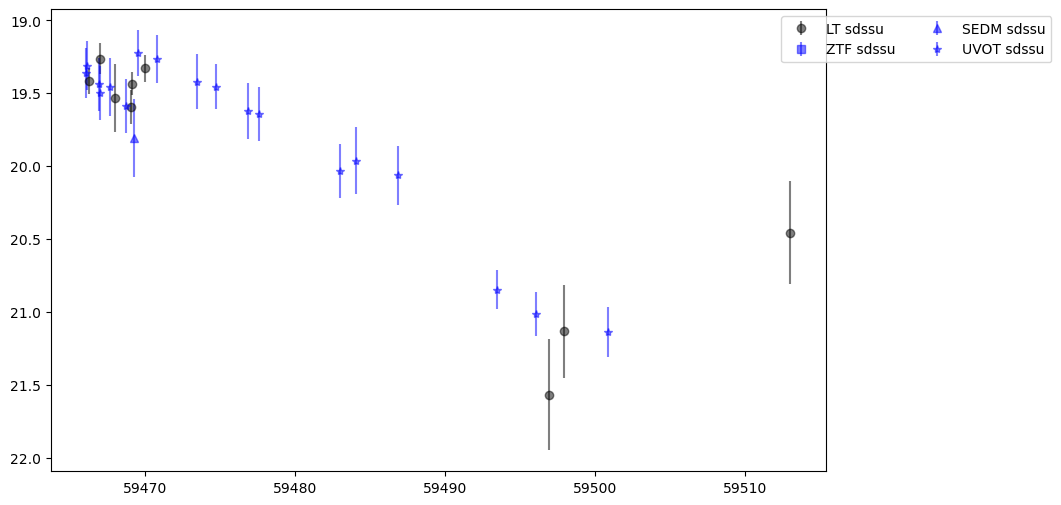

In [25]:
fig=plt.figure(figsize=(10,6))
unique_filts = np.unique(df['filter'])
filt = 'sdssu'
# print(df.loc[(df['filter']=='sdssu')&(df['telescope']=='SLT')&(df['mag']<30)])#&(df['mag']>18)])
df_ltu = df.loc[(df['filter']=='sdssu')&(df['telescope']=='LT')&(df['mag']<30)]
plt.errorbar(df_ltu['mjd'],df_ltu['mag'],yerr=df_ltu['mag_err'],fmt='o',label='LT '+filt,alpha=0.5,color='k')

ztf_u = ztf.loc[ztf['filter']=='ztfu']
plt.errorbar(ztf_u['mjd'],ztf_u['mag'],yerr=ztf_u['magerr'],fmt='s',label='ZTF '+filt,alpha=0.5,color=filt_cols[filt])

# df_sltu= df.loc[(df['filter']=='sdssu')&(df['telescope']=='SLT')&(df['mag']<30)]
# plt.errorbar(df_sltu['mjd'],df_sltu['mag'],yerr=df_sltu['mag_err'],fmt='x',label='SLT '+filt,alpha=0.5,color=filt_cols[filt])

# ioo_ltu = ioo.loc[(ioo['filter']=='sdssu')]
# plt.errorbar(ioo_ltu['mjd'],ioo_ltu['mag'],yerr=ioo_ltu['magerr'],fmt='s',label='LT '+filt,alpha=0.5,color=filt_cols[filt])


sedm_sedmu = sedm.loc[sedm['filter']==filt]
plt.errorbar(sedm_sedmu['mjd'],sedm_sedmu['mag'],yerr=sedm_sedmu['magerr'],fmt='^',label='SEDM '+filt,alpha=0.5,color=filt_cols[filt])

uvot_u = uvot.loc[uvot['filter']=='uvot::u']
plt.errorbar(uvot_u['mjd'],uvot_u['mag'],yerr=uvot_u['magerr'],fmt='*',label='UVOT '+filt,alpha=0.5,color=filt_cols[filt])

# gtc_osirisu = df.loc[(df['filter']==filt)&(df['telescope']=='GTC-OSIRIS')]
# plt.errorbar(gtc_osirisu['mjd'],gtc_osirisu['mag'],yerr=gtc_osirisu['mag_err'],fmt='*',label='GTC-OSIRIS '+filt,alpha=0.5,color=filt_cols[filt])

plt.gca().invert_yaxis()
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1),ncols=2)

# df_ = df.loc[(df['filter']=='sdssu')&(df['telescope']=='SLT')&(df['mag']<30)&(df['mag']>18)]

good_u = df.loc[(df['filter']=='sdssu')&(any(x in ['SLT','LT','GTC-OSIRIS'] for x in df['telescope']))]

In [168]:
#save all the good data to one file

good_u.to_csv(name+'_u.csv',index=False)
good_g.to_csv(name+'_g.csv',index=False)
good_r.to_csv(name+'_r.csv',index=False)
good_i.to_csv(name+'_i.csv',index=False)
good_z.to_csv(name+'_z.csv',index=False)

all_good = pd.concat([good_u,good_g,good_r,good_i,good_z])
all_good.to_csv(name+'_2023vyl.csv',index=False)
print("saved to ",os.getcwd()+'/'+name+'_2023vyl.csv')

saved to  /Users/kryanhinds/subphot_pipe/2023vyl_new_2023vyl.csv


In [ ]:



from astropy.io import fits
from astropy.table import Table

z= Table(fits.open("~/subphot_pipe/config_files/prepsfex_74347.cat")[2].data)



In [ ]:
z

In [ ]:
all_ = Table(fits.open("~/subphot_pipe/config_files/prepsfex_32908.cat")[2].data)
all_[[1,9,17,32,34,37,359]]

In [ ]:
Table(fits.open("~/subphot_pipe/config_files/prepsfex_32908_new.cat")[2].data)